In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
#pip install openpyxl

1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [4]:
df = pd.read_csv("heart_disease1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [7]:
df.shape

(999, 13)

In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [15]:
df.isnull().sum()

age          1
sex          1
cp           1
trestbps     1
chol         1
fbs          1
restecg      1
thalch       1
exang        1
oldpeak     63
slope        1
thal         1
num          1
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(90)

In [ ]:
# Remove duplicates if any
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num         float64
dtype: object

Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [17]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

(Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object'),
 Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'))

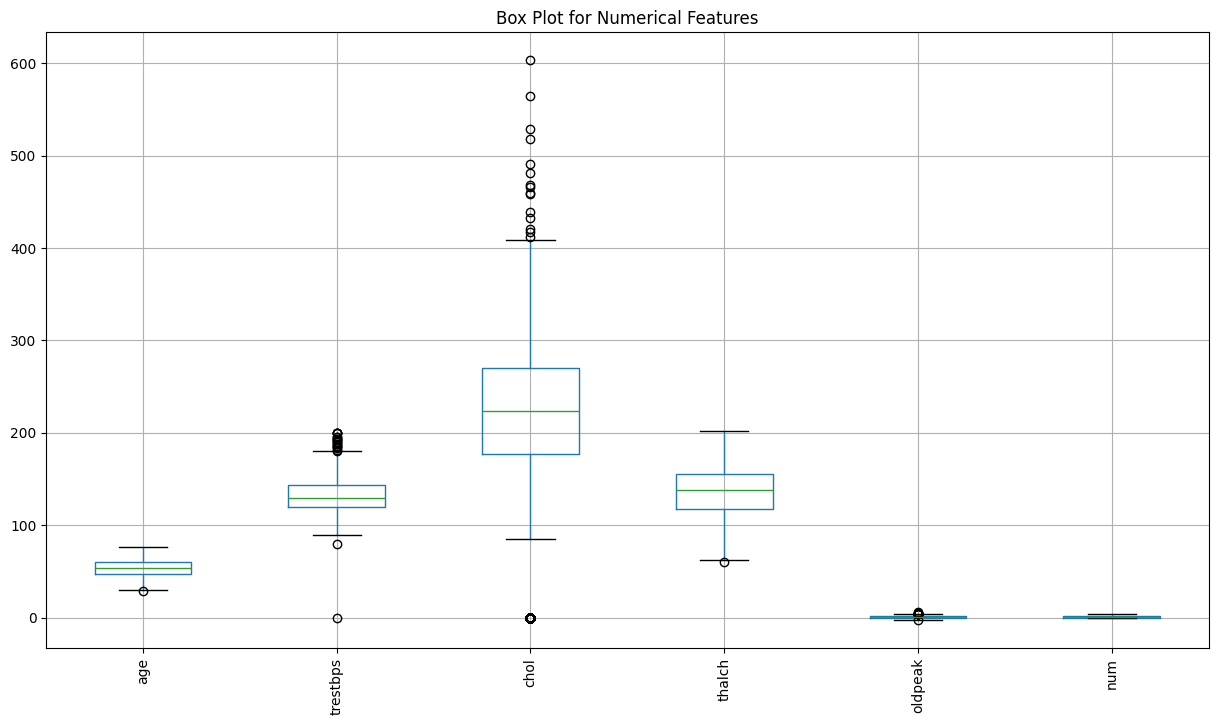

In [18]:
plt.figure(figsize=(15,8))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plot for Numerical Features")
plt.show()

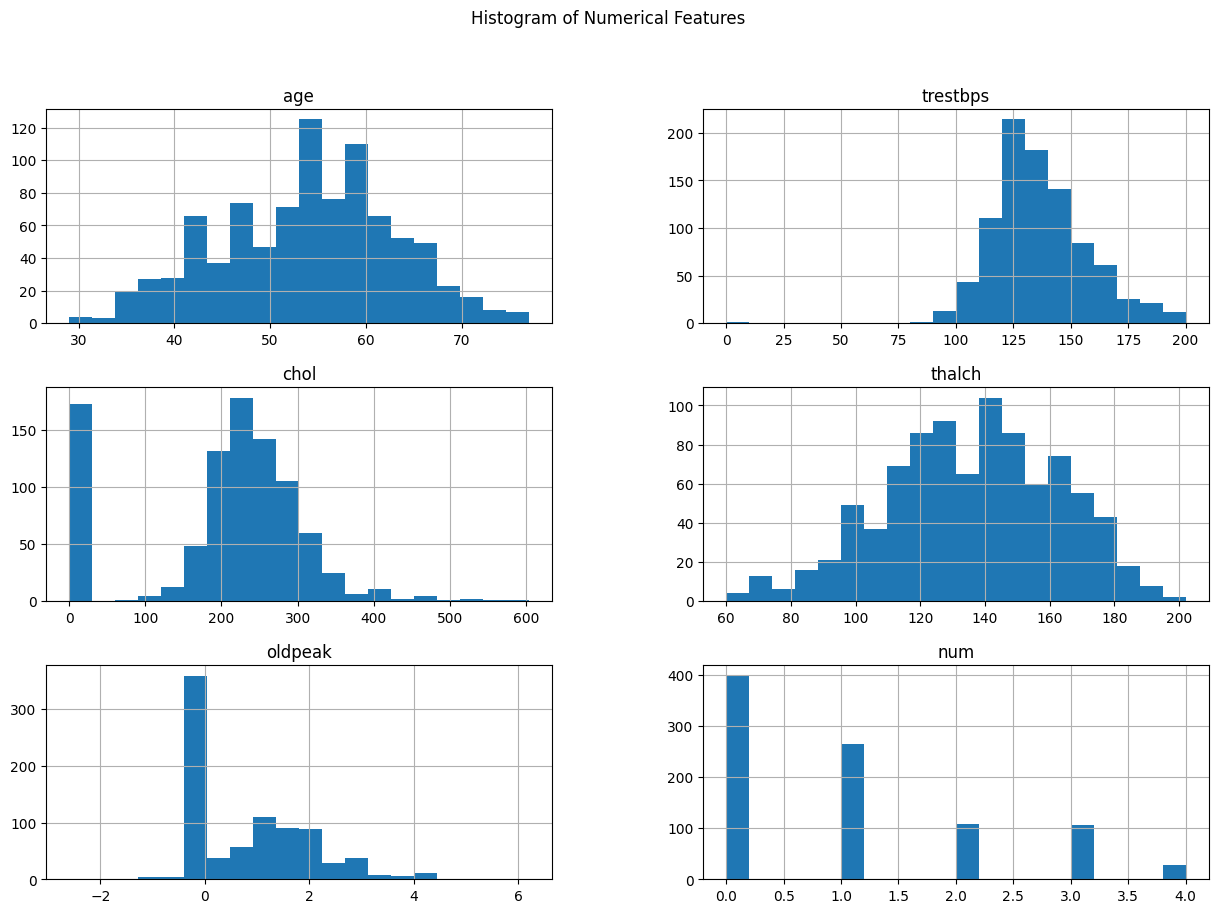

In [19]:
df[numerical_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.show()

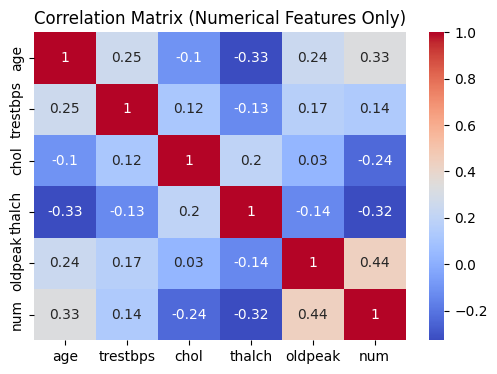

In [ ]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


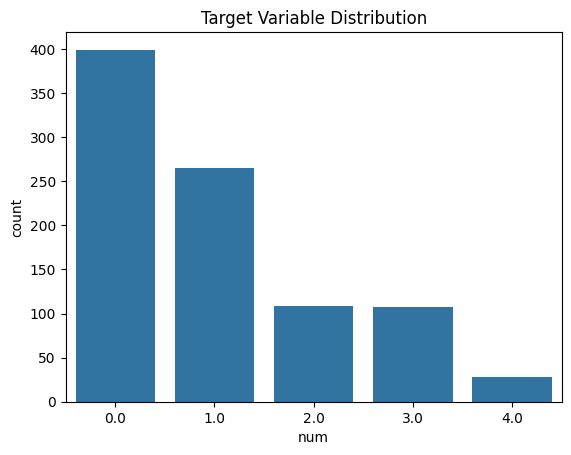

In [ ]:
sns.countplot(x='num', data=df)
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
# Unique values for categorical columns
for col in categorical_cols:
    print(col, ":", df[col].unique())

sex : ['Male' 'Female' nan]
cp : ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal' nan]
fbs : [True False nan]
restecg : ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang : ['FALSE' 'TRUE' 'TURE' nan]
slope : ['downsloping' 'flat' 'upsloping' nan]
thal : ['fixed defect' 'normal' 'reversable defect' nan]


In [32]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num         float64
dtype: object

In [33]:
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [35]:
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [34]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_12608\518003605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_12608\518003605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [36]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_12608\1077209983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_12608\1077209983.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplac

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [ ]:
le = LabelEncoder()

for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [41]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [42]:
minmax = MinMaxScaler()
df[numerical_cols] = minmax.fit_transform(df[numerical_cols])

In [43]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.516502,0.667134,0.334178,0.534925,0.393652,0.252200
std,0.190687,0.101953,0.185802,0.188664,0.120445,0.285952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.600000,0.293532,0.408451,0.295455,0.000000
50%,0.520833,0.650000,0.371476,0.549296,0.352273,0.250000
75%,0.645833,0.720000,0.447761,0.676056,0.465909,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Convert to binary classification
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [46]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
X = df.drop('num', axis=1)
y = df['num']

4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [49]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

In [50]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:,1]

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7417582417582418

In [53]:
precision = precision_score(y_test, y_pred)
precision

0.7619047619047619

In [54]:
recall = recall_score(y_test, y_pred)
recall

0.7843137254901961

In [55]:
f1 = f1_score(y_test, y_pred)
f1

0.7729468599033816

In [56]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.8031250000000001

In [57]:
confusion_matrix(y_test, y_pred)

array([[55, 25],
       [22, 80]])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        80
           1       0.76      0.78      0.77       102

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [60]:
dt = DecisionTreeClassifier(random_state=42)

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [62]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [63]:
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [64]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [65]:
{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [66]:
best_dt_model = grid_search.best_estimator_

In [67]:
y_pred_tuned = best_dt_model.predict(X_test)
y_pred_prob_tuned = best_dt_model.predict_proba(X_test)[:,1]

In [68]:
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
roc_auc = roc_auc_score(y_test, y_pred_prob_tuned)

accuracy, precision, recall, f1, roc_auc

(0.7692307692307693,
 0.8125,
 0.7647058823529411,
 0.7878787878787878,
 0.7720588235294117)

6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [69]:
cm = confusion_matrix(y_test, y_pred_tuned)
cm

array([[62, 18],
       [24, 78]])

In [70]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        80
           1       0.81      0.76      0.79       102

    accuracy                           0.77       182
   macro avg       0.77      0.77      0.77       182
weighted avg       0.77      0.77      0.77       182



In [71]:
accuracy, precision, recall, f1, roc_auc

(0.7692307692307693,
 0.8125,
 0.7647058823529411,
 0.7878787878787878,
 0.7720588235294117)

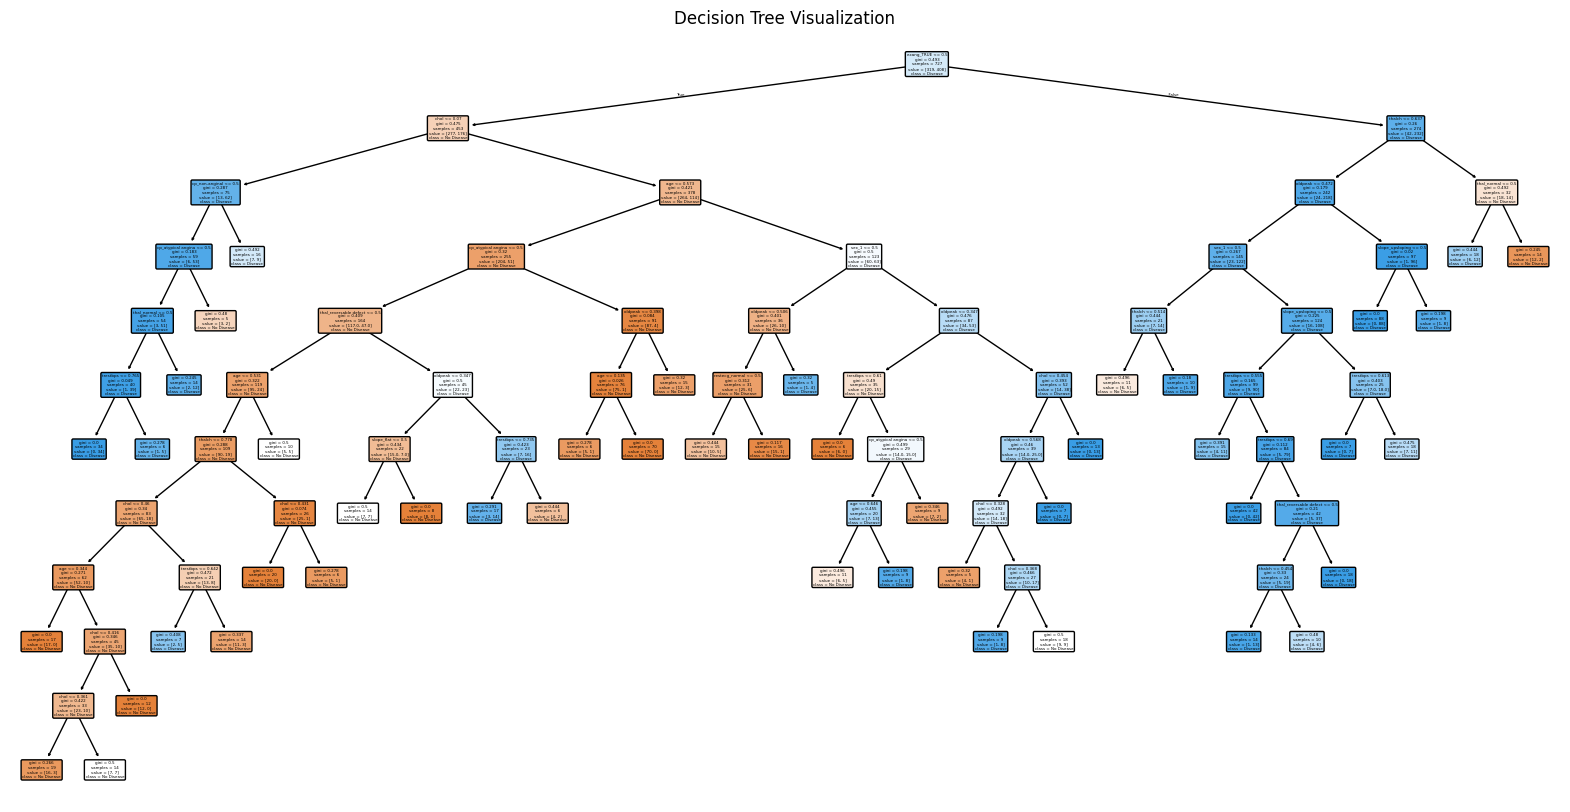

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

In [74]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
12,exang_TRUE,0.324505
2,chol,0.206721
0,age,0.097374
3,thalch,0.075745
4,oldpeak,0.071623
6,cp_atypical angina,0.053755
1,trestbps,0.048073
17,thal_reversable defect,0.032346
5,sex_1,0.032107
16,thal_normal,0.020866


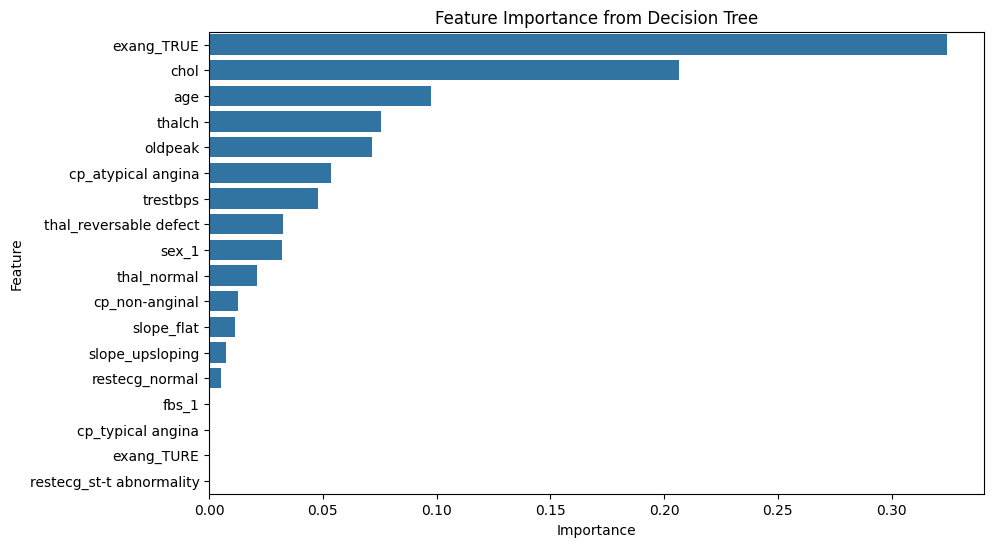

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance from Decision Tree")
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?  
Decision tree hyperparameters control the complexity and behavior of the model. max_depth limits how deep the tree can grow and helps prevent overfitting. min_samples_split and min_samples_leaf control when a node can be split and how many samples a leaf must contain, improving generalization. criterion (gini or entropy) decides how splits are chosen. Proper tuning of these hyperparameters helps balance bias and variance and improves model performance.

2. What is the difference between the Label encoding and One-hot encoding?
Label Encoding converts categorical values into numerical labels by assigning each category a unique integer, which is simple and memory-efficient but may introduce an unintended order among categories. One-Hot Encoding, on the other hand, represents each category as a separate binary column, avoiding any ordinal relationship and making it more suitable for nominal data, though it increases the number of features and dataset size.
